<a href="https://colab.research.google.com/github/Ignaciojeda/ProyectoCSSCrisDm/blob/main/Decision_Tree_Clasificacion.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [19]:
# Librerías generales
import pandas as pd
import numpy as np

# Visualización
import matplotlib.pyplot as plt
import seaborn as sns

# Modelado
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import mean_squared_error, r2_score, confusion_matrix, classification_report, roc_auc_score, mean_absolute_error
from sklearn.model_selection import GridSearchCV
from sklearn.tree import plot_tree, DecisionTreeClassifier
from sklearn.preprocessing import LabelEncoder


In [6]:
from google.colab import drive
drive.mount('/content/drive')

url = '/content/drive/MyDrive/TG_Machine_Learning/datos_datacss.csv'
# Cargar los datos
try:
    data = pd.read_csv(url, sep=",", encoding='latin-1', low_memory=False)
    print("Datos cargados exitosamente!")
except Exception as e:
    print(f"Error al cargar los datos: {e}")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Datos cargados exitosamente!


#Analisis de la variable survived

Distribución de la variable objetivo (¿Sobrevive el jugador?):
Survived
False    47214
True     31943
Name: count, dtype: int64


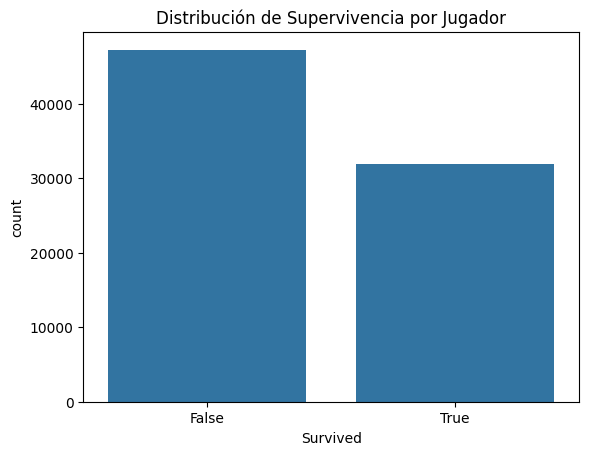

In [7]:
print("Distribución de la variable objetivo (¿Sobrevive el jugador?):")
print(data['Survived'].value_counts())
sns.countplot(x='Survived', data=data)
plt.title("Distribución de Supervivencia por Jugador")
plt.show()


#Preparación del dataset

In [10]:
columnas_usadas = ['Survived', 'RoundWinner', 'Team', 'Map', 'RoundStartingEquipmentValue']
df = data[columnas_usadas].dropna().copy()

# Codificación de variables categóricas
le_team = LabelEncoder()
le_map = LabelEncoder()
le_winner = LabelEncoder()

df['Team'] = le_team.fit_transform(df['Team'])
df['Map'] = le_map.fit_transform(df['Map'])
df['RoundWinner'] = le_winner.fit_transform(df['RoundWinner'])

In [11]:
y = df['Survived']
X = df.drop('Survived', axis=1)

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, random_state=42)

print(f"Tamaño del conjunto de entrenamiento: {X_train.shape}")
print(f"Tamaño del conjunto de prueba: {X_test.shape}")

Tamaño del conjunto de entrenamiento: (55409, 4)
Tamaño del conjunto de prueba: (23748, 4)


In [15]:


clf = DecisionTreeClassifier(random_state=42)
clf.fit(X_train, y_train)


DecisionTreeClassifier(random_state=42)

In [16]:
y_pred = clf.predict(X_test)

##Matriz de confusion

In [20]:


print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nReporte de clasificación:")
print(classification_report(y_test, y_pred))
print("\nMatriz de confusión:")
print(confusion_matrix(y_test, y_pred))


Accuracy: 0.6897844028970861

Reporte de clasificación:
              precision    recall  f1-score   support

       False       0.75      0.72      0.73     14216
        True       0.61      0.65      0.63      9532

    accuracy                           0.69     23748
   macro avg       0.68      0.68      0.68     23748
weighted avg       0.69      0.69      0.69     23748


Matriz de confusión:
[[10178  4038]
 [ 3329  6203]]


#Visualizacion del arbol

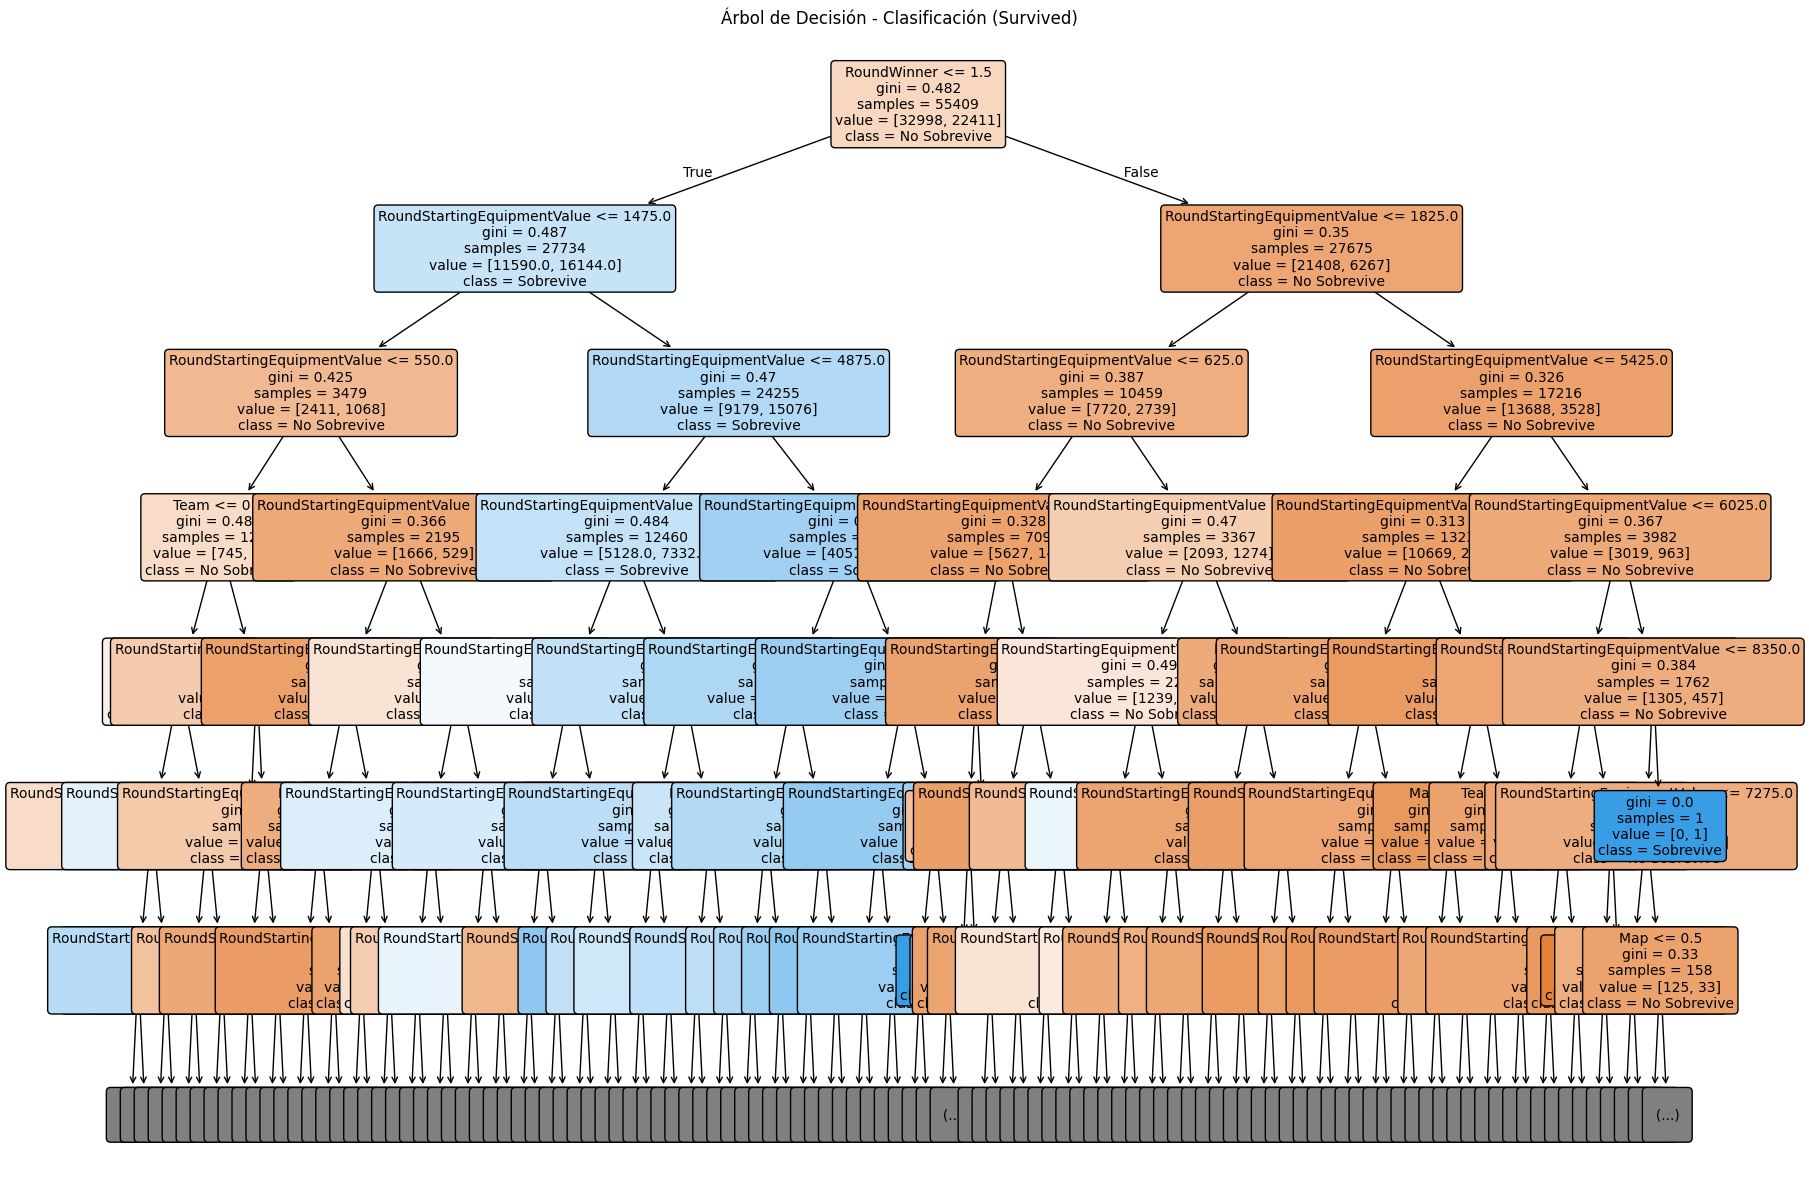

In [31]:
plt.figure(figsize=(20, 15))
plot_tree(
    clf,
    feature_names=X.columns,
    class_names=['No Sobrevive', 'Sobrevive'],
    filled=True,
    rounded=True,
    max_depth=6,
    fontsize=10,
)
plt.title("Árbol de Decisión - Clasificación (Survived)")
plt.show()


##Importacion de los valores a la hora de predecir

In [34]:
importancias = pd.DataFrame({
    'Variable': X.columns,
    'Importancia': clf.feature_importances_
})

# Ordenarlo de mayor a menor importancia
importancias = importancias.sort_values(by='Importancia', ascending=False)

print(importancias)

                      Variable  Importancia
0                  RoundWinner     0.624074
3  RoundStartingEquipmentValue     0.300349
2                          Map     0.052821
1                         Team     0.022756


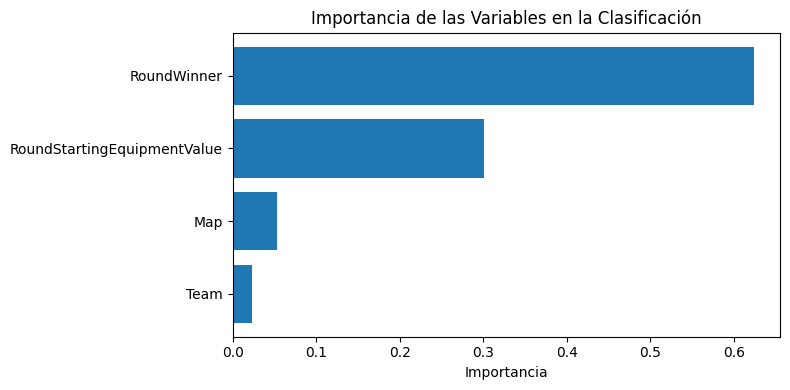

In [35]:
plt.figure(figsize=(8, 4))
plt.barh(importancias['Variable'], importancias['Importancia'])
plt.xlabel('Importancia')
plt.title('Importancia de las Variables en la Clasificación')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()


##Reporte de clasificacion


In [37]:
print("Reporte de Clasificación:")
print(classification_report(y_test, y_pred))

Reporte de Clasificación:
              precision    recall  f1-score   support

       False       0.75      0.72      0.73     14216
        True       0.61      0.65      0.63      9532

    accuracy                           0.69     23748
   macro avg       0.68      0.68      0.68     23748
weighted avg       0.69      0.69      0.69     23748



**1. Exactitud General (Accuracy): 0.69**
El modelo predice correctamente en el 69% de los casos.

Este valor es aceptable, especialmente considerando que el problema no está perfectamente balanceado (más ejemplos de False que de True).

**Interpretación:**

Clase False (No sobrevive):

Alta precisión: cuando el modelo predice que alguien no sobrevive, suele acertar.

Pero menor recall: a veces no detecta correctamente a los que realmente no sobreviven.

Clase True (Sobrevive):

Menor precisión: hay más falsos positivos (predice que sobrevive, pero no).

Buen recall: detecta bien a quienes sí sobreviven.

